In [75]:

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras import models
# from keras.layers import Dense
#from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import array

## importing libraries

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from sklearn import preprocessing
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import sklearn.metrics
import math
from numpy import mean
from numpy import std

from sklearn.metrics import mean_squared_error, r2_score


print('Done importing libraries')

Done importing libraries


In [76]:
## Functions used throughout code
from sklearn.model_selection import cross_validate

def cross_validate_scores(model_var, X_var, y_var):
    scoring_metrics = ["explained_variance", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "neg_median_absolute_error", "r2"] #"neg_mean_squared_log_error"
    scores = cross_validate(model_var, X_var, y_var, scoring=scoring_metrics, cv=10)
    
    #calculate adj r^2
    n = len(X_train)
    k = len(X.columns)
    adj_r2_list = []
    for r2 in scores["test_r2"]:
        adj_r2 = 1-(((1-r2)*(n-1))/(n-k-1))
        adj_r2_list.append(adj_r2)   
    scores["adj_r2"] = adj_r2_list
   
    print(scores["test_r2"])
    for key in scores:
        scores[key] = round(mean(scores[key]), 5)
   
    return scores


def resid_plot(model_var, X_train_var, X_test_var):
    #define plot
    fig, ax = plt.subplots()
    plt.style.use("fivethirtyeight")

    #plot reside in train data
    plt.scatter(model_var.predict(X_train_var), model_var.predict(X_train_var) - y_train, color = "blue", s = 5, label = 'Train data')
    
    #plot resid in test data
    plt.scatter(model_var.predict(X_test_var), model_var.predict(X_test_var) - y_test, color = "red", s = 5, label = 'Test data')
    
    #plot zero error line for easier visibility
    plt.hlines(y = 0, xmin = 0, xmax = ax.get_xbound()[1], linewidth = 1, color = "black")
    
    #plot legend and title
    plt.legend(loc = 'best')
    plt.xlabel(xlabel="Predicted Value (μg/m^3)")
    plt.ylabel(ylabel="Residual (μg/m^3)")
    plt.title("Residual errors")

    #show plot
    plt.show()

In [77]:
df = pd.read_csv("../Data/Bangkok2021.csv")
df = df.dropna()
df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6629 entries, 0 to 6628
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       6629 non-null   object 
 1   Time       6629 non-null   object 
 2   O3         6629 non-null   float64
 3   PM2.5      6629 non-null   float64
 4   PM10       6629 non-null   float64
 5   CO         6629 non-null   float64
 6   SO2        6629 non-null   float64
 7   NO2        6629 non-null   float64
 8   Temp       6629 non-null   float64
 9   RHum       6629 non-null   float64
 10  WSpd       6629 non-null   float64
 11  O3_P1      6629 non-null   float64
 12  O3_P4      6629 non-null   float64
 13  O3_P8      6629 non-null   float64
 14  O3_P24     6629 non-null   float64
 15  PM2.5_P1   6629 non-null   float64
 16  PM2.5_P4   6629 non-null   float64
 17  PM2.5_P8   6629 non-null   float64
 18  PM2.5_P24  6629 non-null   float64
dtypes: float64(17), object(2)
memory usage: 1.0+ MB


In [78]:
X = df[["O3", "PM2.5", "PM10", "CO", "SO2", "NO2", "Temp", "RHum", "WSpd"]]

y = df['PM2.5_P24']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.1)

print("Training Dataset Size: {} trials".format(X_train.shape[0]))
print("Testing Dataset Size: {} trial".format(X_test.shape[0]))

print('Variables Defined')

Training Dataset Size: 5966 trials
Testing Dataset Size: 663 trial
Variables Defined


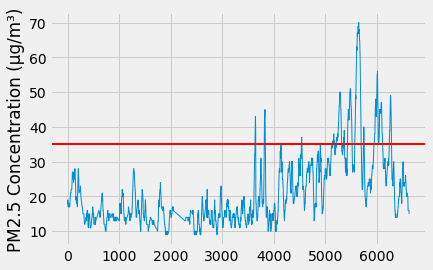

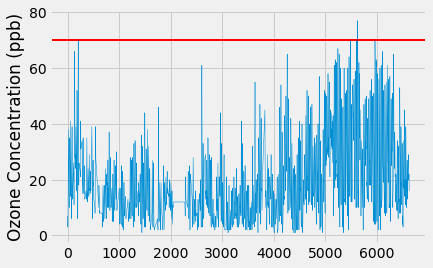

In [92]:
#PLOT PM2.5 AND O3 WITH COMPARISON TO MAXIMUM AMOUNT

import matplotlib

plt.plot(df["PM2.5"], linewidth = 1)
plt.axhline(35, color = "red", linewidth = 2)
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.show()

plt.plot(df["O3"]*1000, linewidth = .5)
plt.axhline(70, color = "red", linewidth = 2)
plt.ylabel("Ozone Concentration (ppb)")
plt.show()




In [ ]:
from sklearn import preprocessing
#robust scaler
scaler = preprocessing.RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)

#minmax
# X_train_scaled = preprocessing.minmax_scale(X_train, feature_range = (0,1))
# X_test_scaled =  preprocessing.minmax_scale(X_test, feature_range = (0,1))
# X_scaled =  preprocessing.minmax_scale(X, feature_range = (0,1))

#StandardScaler
# scaler = preprocessing.StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_scaled = scaler.fit_transform(X)

print('Data Scaled')

Data Scaled


Coefficients: 
Intercept: 17.17243881328336
O3: 0.5863910840691763
PM2.5: 8.290517123180667
PM10: 2.182053264630214
CO: 1.266152672698133
SO2: 0.6425574420154546
NO2: 0.7372172047648328
Temp: 0.0
RHum: 0.0
WSpd: 0.0
Scores Training
[0.8730805  0.84032023 0.81631034 0.73692466 0.55526619 0.7006546
 0.86038025 0.8908719  0.90481688 0.91729865]
fit_time: 0.0052
score_time: 0.0039
test_explained_variance: 0.81464
test_neg_mean_absolute_error: -1.7001
test_neg_mean_squared_error: -6.55877
test_neg_root_mean_squared_error: -2.34456
test_neg_median_absolute_error: -1.22642
test_r2: 0.80959
adj_r2: 0.8093


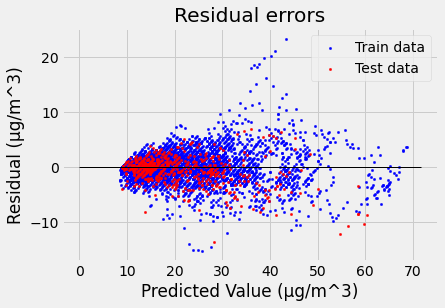

In [ ]:
#multiple linear regression
from sklearn.linear_model import LinearRegression


multi_lin_reg = LinearRegression(positive=True)
multi_lin_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(multi_lin_reg.intercept_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(multi_lin_reg.coef_[i]))

print("Scores Training")
multi_reg_scores = cross_validate_scores(multi_lin_reg, X_scaled, y)
for key in multi_reg_scores:
    print(key + ": " + str(multi_reg_scores[key]))

resid_plot(multi_lin_reg, X_train_scaled, X_test_scaled)


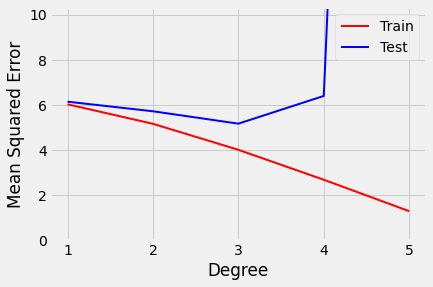

Degrere of Polynomial: 3
Scores Training
[0.80072058 0.82479637 0.819623   0.7440202  0.52638671 0.63858608
 0.83297949 0.74757864 0.91558216 0.88943424]
fit_time: 0.75322
score_time: 0.0043
test_explained_variance: 0.7805
test_neg_mean_absolute_error: -1.8529
test_neg_mean_squared_error: -8.14592
test_neg_root_mean_squared_error: -2.6122
test_neg_median_absolute_error: -1.33451
test_r2: 0.77397
adj_r2: 0.77363


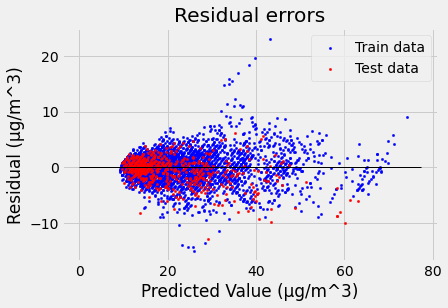

In [ ]:
## polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def poly_fit(n):
  train_mse = []
  test_mse = []
  for i in range(1,n+1):
    poly_reg = PolynomialFeatures(degree=i)
    X_poly_train = poly_reg.fit_transform(X_train_scaled)
    X_poly_test = poly_reg.fit_transform(X_test_scaled)

    linreg_poly = LinearRegression()
    linreg_poly.fit(X_poly_train, y_train)
    train_mse.append((mean_squared_error(y_train, linreg_poly.predict(X_poly_train))))
    test_mse.append((mean_squared_error(y_test, linreg_poly.predict(X_poly_test))))
  plt.plot(np.arange(1,n+1,1), train_mse, color="red", linewidth = 2, label = "Train")
  plt.plot(np.arange(1,n+1,1), test_mse, color="blue", linewidth = 2, label = "Test")
  plt.ylim(0, 2*min(test_mse))
  plt.style.use("fivethirtyeight")
  plt.xlabel("Degree")
  plt.ylabel("Mean Squared Error")
  plt.xticks(np.arange(1,n+1,1))
  plt.legend(loc = "best")
  plt.show()
  return test_mse.index(min(test_mse[1:])) + 1 #returns the best degree train

degree = poly_fit(5)
print("Degrere of Polynomial: " + str(degree))
poly_reg = PolynomialFeatures(degree=degree)
X_poly = poly_reg.fit_transform(X_scaled)
X_train_poly = poly_reg.fit_transform(X_train_scaled)
X_test_poly = poly_reg.fit_transform(X_test_scaled)


linreg_poly = LinearRegression(positive= True)
linreg_poly.fit(X_train_poly, y_train)

print("Scores Training")
poly_reg_scores = cross_validate_scores(linreg_poly, X_poly, y)
for key in poly_reg_scores:
    print(key + ": " + str(poly_reg_scores[key]))

resid_plot(linreg_poly, X_train_poly, X_test_poly)

Coefficients: 
Intercept: 17.05021175676278
9
O3: 0.3792200267253791
PM2.5: 8.585452575884089
PM10: 1.7489558285242883
CO: 0.8940618952886313
SO2: 0.22826064837650906
NO2: 0.451327912901025
Temp: 0.0
RHum: 0.0
WSpd: 0.0
Scores Training
[0.88063048 0.83390784 0.81243357 0.73736217 0.56083312 0.68541232
 0.84117566 0.88686321 0.91861437 0.90591512]
fit_time: 0.06497
score_time: 0.00483
test_explained_variance: 0.80932
test_neg_mean_absolute_error: -1.68984
test_neg_mean_squared_error: -6.59991
test_neg_root_mean_squared_error: -2.36124
test_neg_median_absolute_error: -1.19132
test_r2: 0.80631
adj_r2: 0.80602


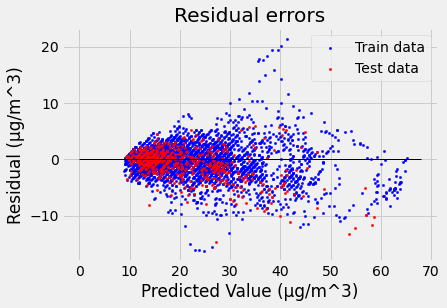

In [ ]:
## RANSAC

from sklearn.linear_model import RANSACRegressor, LinearRegression

ransac_reg = RANSACRegressor(LinearRegression(positive=True), random_state = 42)
ransac_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
print("Coefficients: ")
print("Intercept: " + str(ransac_reg.estimator_.intercept_))
print(len(ransac_reg.estimator_.coef_))
for i in range(len(X.columns)):
    print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
ransac_reg_scores = cross_validate_scores(ransac_reg, X_scaled, y)
for key in ransac_reg_scores:
    print(key + ": " + str(ransac_reg_scores[key]))

resid_plot(ransac_reg, X_train_scaled, X_test_scaled)



Tree: 
aaa
Scores Training
[0.76536574 0.75503834 0.76028414 0.71794788 0.5015328  0.6504931
 0.80231703 0.76925419 0.74344095 0.85846462]
fit_time: 0.03001
score_time: 0.0054
test_explained_variance: 0.7367
test_neg_mean_absolute_error: -2.14639
test_neg_mean_squared_error: -11.85954
test_neg_root_mean_squared_error: -3.02657
test_neg_median_absolute_error: -1.5378
test_r2: 0.73241
adj_r2: 0.73201


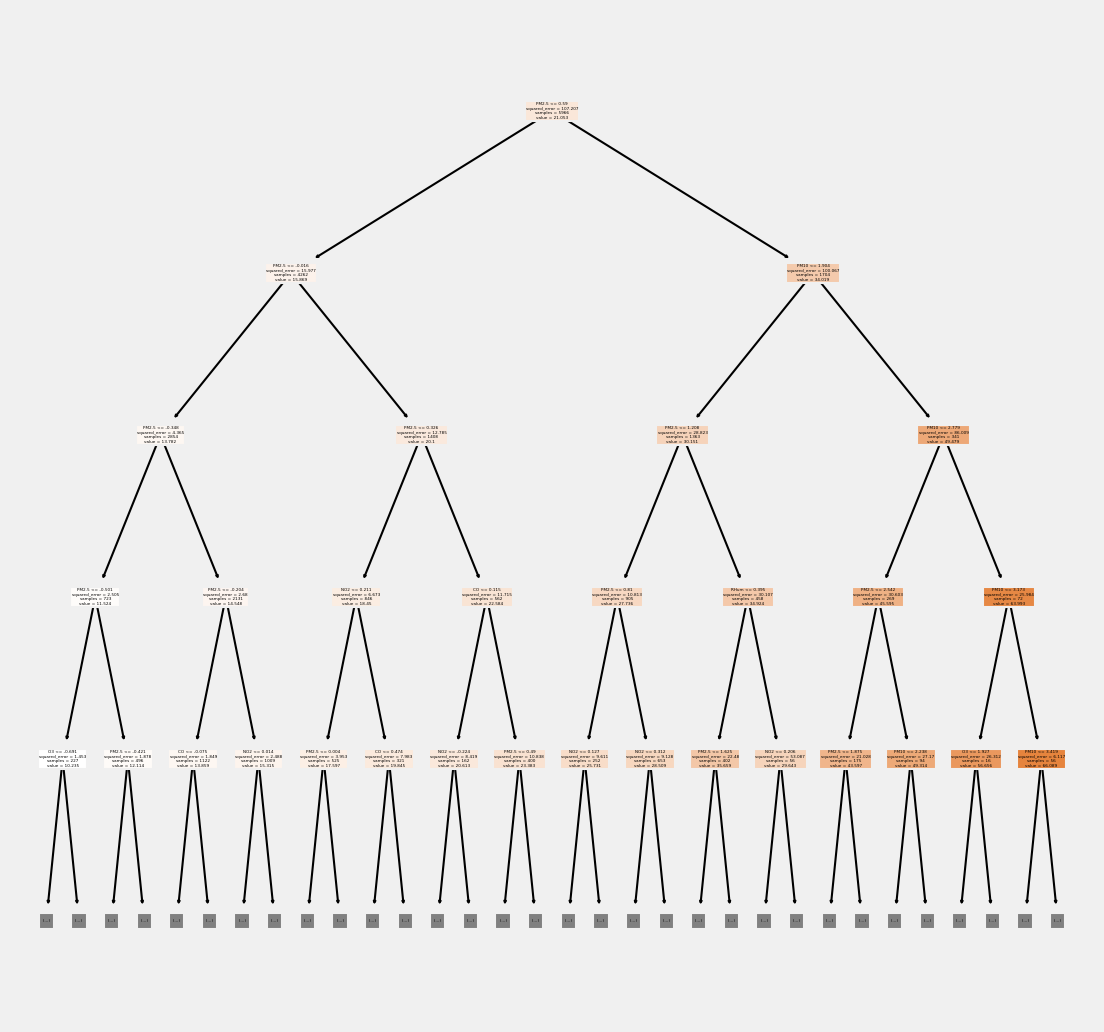

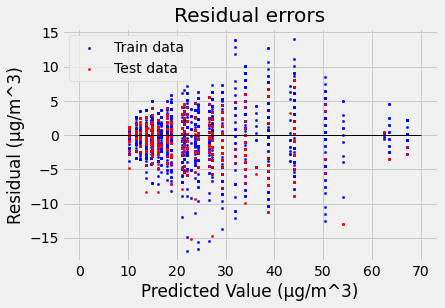

In [ ]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree


decision_tree_reg = DecisionTreeRegressor(random_state = 42, max_depth = 5)
decision_tree_reg.fit(X_train_scaled, y_train)


#Print Coefficients and Weight
print("Tree: ")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_reg, max_depth = 4, feature_names = X.columns, filled = True)

print("aaa")
# dot_data = tree.export_graphviz(decision_tree_reg,out_file=None,feature_names=X.columns)
# graph = graphviz.Source(dot_data)
# graph.render("image",view=True)

# import export_graphviz
# from sklearn.tree import export_graphviz 
  
# # export the decision tree to a tree.dot file
# # for visualizing the plot easily anywhere
# export_graphviz(decision_tree_reg, out_file ='tree.dot',
#                feature_names =X.columns, view=True) 

print("Scores Training")
decision_tree_reg_scores = cross_validate_scores(decision_tree_reg, X_scaled, y)
for key in decision_tree_reg_scores:
    print(key + ": " + str(decision_tree_reg_scores[key]))


resid_plot(decision_tree_reg, X_train_scaled, X_test_scaled)

Scores Training
[0.84130104 0.80160062 0.79746125 0.70074049 0.55092572 0.687573
 0.84423932 0.83438346 0.75343975 0.89092962]
fit_time: 8.24538
score_time: 0.08125
test_explained_variance: 0.77469
test_neg_mean_absolute_error: -1.96065
test_neg_mean_squared_error: -10.2816
test_neg_root_mean_squared_error: -2.77752
test_neg_median_absolute_error: -1.34941
test_r2: 0.77026
adj_r2: 0.76991


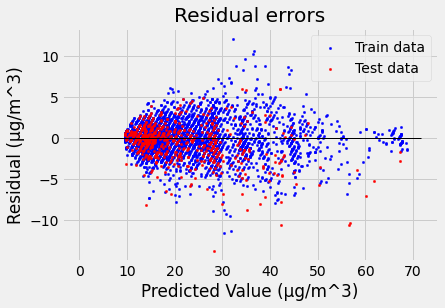

Tree: 


In [ ]:
## Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

random_forest_reg = RandomForestRegressor(random_state = 42, max_depth = 7, n_estimators = 300)
random_forest_reg.fit(X_train_scaled, y_train)

# random_forest = RandomForestRegressor()
# random_forest.fit(X_train_scaled, y_train)
# ### Grid Search ###
# num_leafs = [1,2,4,6,10]

# parameters = [{'n_estimators' : range(100,400,25),
#              'max_depth': range(1,10,2),
#              'min_samples_leaf':num_leafs
#              }]

# random_forest_reg = GridSearchCV(estimator=random_forest, param_grid=parameters,cv = 10)
# random_forest_reg.fit(X_train_scaled, y_train)
# print("found best param")
# print(random_forest_reg.best_params_)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


print("Scores Training")
random_forest_reg_scores = cross_validate_scores(random_forest_reg, X_scaled, y)
for key in random_forest_reg_scores:
    print(key + ": " + str(random_forest_reg_scores[key]))


resid_plot(random_forest_reg, X_train_scaled, X_test_scaled)

print("Tree: ")

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# sklearn.tree.plot_tree(random_forest_reg, max_depth = 4, feature_names = X.columns, filled = True)


Scores Training
[0.64133347 0.61141863 0.66625202 0.56956659 0.34737204 0.66695621
 0.74161323 0.79367763 0.71614969 0.86236575]
fit_time: 2.11343
score_time: 0.05156
test_explained_variance: 0.67063
test_neg_mean_absolute_error: -2.38807
test_neg_mean_squared_error: -13.03146
test_neg_root_mean_squared_error: -3.24675
test_neg_median_absolute_error: -1.81888
test_r2: 0.66167
adj_r2: 0.66116


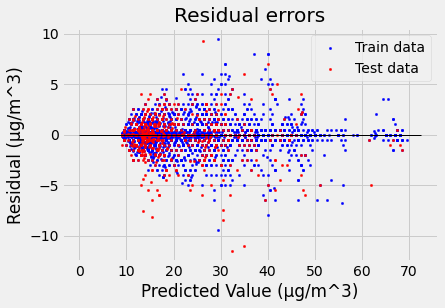

In [ ]:
## K Nearest Neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# knn_model = KNeighborsRegressor(n_neighbors=3)
# knn_model.fit(X_train_scaled, y_train)

parameters = {"n_neighbors": range(1, 5)}
knn_model = GridSearchCV(KNeighborsRegressor(), parameters)
knn_model.fit(X_train_scaled, y_train)

print("Scores Training")
knn_model_scores = cross_validate_scores(knn_model, X_scaled, y)
for key in knn_model_scores:
    print(key + ": " + str(knn_model_scores[key]))


resid_plot(knn_model, X_train_scaled, X_test_scaled)

[30.04639424 30.04639424 30.04639424 ... 30.04639424 30.04639424
 30.04639424]
Scores Training
[0.85900591 0.84009462 0.79559235 0.7172677  0.55245627 0.74245721
 0.84041562 0.89328262 0.52277391 0.91058207]
fit_time: 4.14603
score_time: 0.83829
test_explained_variance: 0.77579
test_neg_mean_absolute_error: -1.96167
test_neg_mean_squared_error: -13.59709
test_neg_root_mean_squared_error: -2.88178
test_neg_median_absolute_error: -1.28845
test_r2: 0.76739
adj_r2: 0.76704


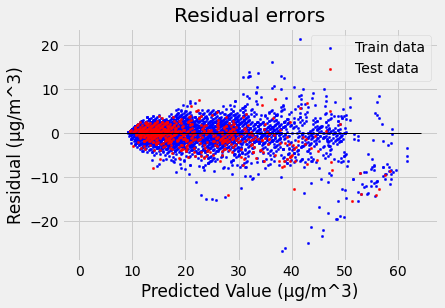

In [ ]:
## SVM

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# parameters = {
#     "kernel": ["rbf"],
#     "C": [1,10,10,100,1000],
#     "gamma": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#     
# }

# svm_reg = GridSearchCV(SVR(), parameters, cv=5, verbose=2)

svm_reg = SVR(kernel='rbf', gamma = 'auto', epsilon = .0001)
svm_reg.fit(X_train_scaled, y_train)
print(svm_reg.predict(X_train.values))

print("Scores Training")
svm_reg_scores = cross_validate_scores(svm_reg, X_scaled, y)
for key in svm_reg_scores:
    print(key + ": " + str(svm_reg_scores[key]))

resid_plot(svm_reg, X_train_scaled, X_test_scaled)

In [ ]:
print(X_train.values)

[[1.50e-02 1.30e+01 2.70e+01 ... 2.90e+01 7.90e+01 1.80e+00]
 [1.90e-02 1.20e+01 2.30e+01 ... 3.50e+01 5.50e+01 5.50e+00]
 [2.00e-03 2.10e+01 4.10e+01 ... 2.67e+01 9.00e+01 0.00e+00]
 ...
 [2.80e-02 3.70e+01 6.50e+01 ... 2.36e+01 5.80e+01 0.00e+00]
 [4.80e-02 2.90e+01 5.40e+01 ... 2.85e+01 5.50e+01 0.00e+00]
 [1.70e-02 1.50e+01 2.80e+01 ... 3.12e+01 7.70e+01 0.00e+00]]


Scores Training
[ 0.7710262   0.72178608  0.45269698 -0.01846605  0.37262867  0.64515293
  0.7643137   0.85255088  0.64045898  0.81995285]
fit_time: 0.75115
score_time: 0.01567
test_explained_variance: 0.72003
test_neg_mean_absolute_error: -2.50992
test_neg_mean_squared_error: -14.6982
test_neg_root_mean_squared_error: -3.37929
test_neg_median_absolute_error: -1.89314
test_r2: 0.60221
adj_r2: 0.60161


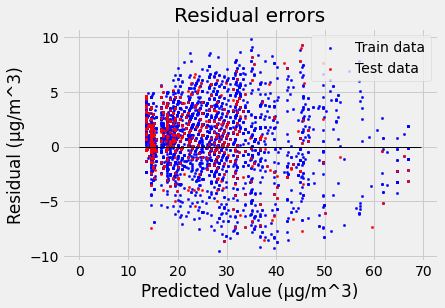

In [ ]:
## AdaBoost

from sklearn.ensemble import AdaBoostRegressor


ada_boost_reg = AdaBoostRegressor(n_estimators=50)
ada_boost_reg.fit(X_train, y_train)

print("Scores Training")
ada_boost_reg_scores = cross_validate_scores(ada_boost_reg, X, y)
for key in ada_boost_reg_scores:
    print(key + ": " + str(ada_boost_reg_scores[key]))


resid_plot(ada_boost_reg, X_train, X_test)


Scores Training
[0.81510332 0.81922637 0.77805045 0.70157195 0.59536357 0.69846372
 0.83312937 0.82484722 0.76710505 0.88654266]
fit_time: 0.13669
score_time: 0.0093
test_explained_variance: 0.77523
test_neg_mean_absolute_error: -1.99726
test_neg_mean_squared_error: -10.13935
test_neg_root_mean_squared_error: -2.78051
test_neg_median_absolute_error: -1.45808
test_r2: 0.77194
adj_r2: 0.7716


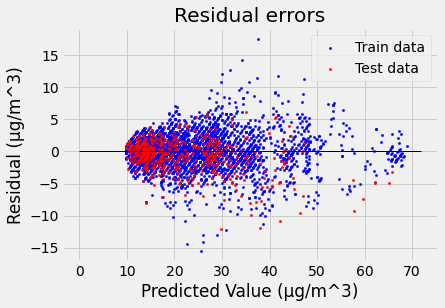

In [ ]:
## XGBoost

import xgboost as xg

xgb_reg = xg.XGBRegressor(max_depth=2, n_estimators=40, verbosity = 0, random_state = 42)
xgb_reg.fit(X_train_scaled, y_train)

#Print Coefficients and Weight
# print("Coefficients: ")
# print("Intercept: " + str(ransac_reg.estimator_.intercept_))
# print(len(ransac_reg.estimator_.coef_))
# for i in range(len(X.columns)):
#     print(X.columns[i] + ": " + str(ransac_reg.estimator_.coef_[i]))

print("Scores Training")
xgb_reg_scores = cross_validate_scores(xgb_reg, X_scaled, y)
for key in xgb_reg_scores:
    print(key + ": " + str(xgb_reg_scores[key]))

resid_plot(xgb_reg, X_train_scaled, X_test_scaled)

In [ ]:
## scores

sum_scores = {"Multiple Linear Regression": multi_reg_scores, "Polynomical Regression": poly_reg_scores, "RANSAC Regression": ransac_reg_scores, "Decision Tree Regression": decision_tree_reg_scores, "Random Forest Regression": random_forest_reg_scores, "KNN Regression": knn_model_scores, "SVM Regression": svm_reg_scores, "ADA Boost Regression": ada_boost_reg_scores, "XGB Regression": xgb_reg_scores}
targets = {"R^2 adjusted": "adj_r2"}

for target in targets:
    print(target)
    for key in sum_scores:
        print(key + ": " + str(sum_scores[key][targets[target]]))
    print()
    

R^2 adjusted
Multiple Linear Regression: 0.8093
Polynomical Regression: 0.77363
RANSAC Regression: 0.80602
Decision Tree Regression: 0.73201
Random Forest Regression: 0.76991
KNN Regression: 0.66116
SVM Regression: 0.76704
ADA Boost Regression: 0.60161
XGB Regression: 0.7716



In [ ]:
### TESTING

yPredln = multi_lin_reg.predict(X_test_scaled)
# yPredkn = knRegressor.predict(X_test_scaled)
# yPredsvr = svrRegressor.predict(X_test_scaled)

predR2ln = str((round((r2_score(y_test,yPredln)), 3)))
# predR2kn = str((round((r2_score(y_test,yPredkn)), 3)))
# predR2svr = str((round((r2_score(y_test,yPredsvr)), 3)))

# print(predR2ln, predR2kn, predR2svr)

The R^2 value for Linear Regression is   : 0.94


C:\Users\200401233\AppData\Local\Temp\ipykernel_13784\3943883479.py:11: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b= True)


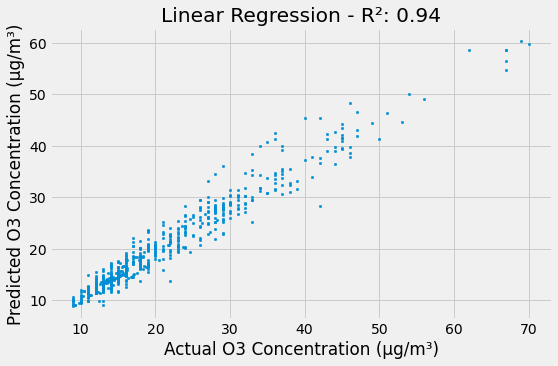

In [ ]:
# ln reg


print('The R^2 value for Linear Regression is   :', round((r2_score(y_test,yPredln)), 3))
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(111)
plt.scatter(y_test, yPredln, s= 6)

plt.xlabel('Actual O3 Concentration (µg/m³)')
plt.ylabel('Predicted O3 Concentration (µg/m³)')
plt.grid(b= True)
plt.title("Linear Regression - R²: %s" %predR2ln)
plt.show()


# print(len(X_test))
# print(len(yPredln))
# print(min(y_test), max(y_test))
# xspace = np.linspace(min(y_test), max(y_test), num = 1000)
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(X_test.O3, y_test, s= 6)
# plt.scatter(xspace, multi_lin_reg.predict(xspace), s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("Linear Regression - R²: %s" %predR2ln)
# plt.show()


# # kn reg
# print('The R^2 value for KNN Regression is   :', round((r2_score(y_test,yPredkn)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredkn, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("KNN Regression - R²: %s" %predR2kn)
# plt.show()


# # svr reg
# print('The R^2 value for SVM Regression is   :', round((r2_score(y_test,yPredsvr)), 3))
# fig = plt.figure(figsize=(8, 5))
# ax1 = fig.add_subplot(111)
# plt.scatter(y_test, yPredsvr, s= 6)

# plt.xlabel('Actual O3 Concentration (µg/m³)')
# plt.ylabel('Predicted O3 Concentration (µg/m³)')
# plt.grid(b= True)
# plt.title("SVM Regression - R²: %s" %predR2svr)
# plt.show()